## Scylla make averaged maps

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
import tables
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS
import pyregion

import os
from megabeast.tools import make_naive_maps
import importlib

fontsize = 16
font = {"size": fontsize}
plt.rc("font", **font)

In [13]:
gal = 'SMIDGE' #'SMC'

stats_file = sorted(glob('../beast_stats_files/' + gal + '/*HRC.fits'))

nfiles = len(stats_file)
print('N files', nfiles)

outfolder = "../averaged_maps/"
outfolder_sigmas = "../averaged_map_sigmas/"
# pix_sizes: [CO=1.4 (K. Jamison map), CO=7 (APEX, Saldano/Bolatto), q_pah=36 (Jeremy), sigma_dust1=36 (Jeremy), 
#             HI (ASKAP), sigma_dust2 (Heritage Spire Herschel, M. Meixner)] 
# pix_sizes = [1.4, 7, 36, 36, 30, 21] 

pix_size = 7
median=False

N files 18


### Setup naive map folder structure & make naive maps

In [14]:
# =============================== !!!!!!!!!! =================================
# ======= Files need to have 'stats' in name for code to work properly =======

map_folder = outfolder + str(pix_size) + "arcsec/"
map_folder_sig = outfolder_sigmas + str(pix_size) + "arcsec/"

for i in range(nfiles):
    stats_file_fits_only = stats_file[i].split('/')[-1]
    new_file_fits_only = map_folder + stats_file_fits_only.replace("_HRC.", ".")
    print('stats_file_fits_only', stats_file_fits_only)
    print('new_file_fits_only', new_file_fits_only)

    if not os.path.isdir(map_folder):
        os.system("mkdir " + map_folder)
    if not os.path.isdir(map_folder_sig):
        os.system("mkdir " + map_folder_sig)
    
    if not os.path.isfile(map_folder + stats_file_fits_only.replace("_HRC.", ".")):
        print('copy stats_file into map floder')
        os.system("cp " + stats_file[i] + " " + map_folder + stats_file_fits_only.replace("_HRC.", "."))
        
    if not os.path.isfile(map_folder_sig + stats_file_fits_only.replace("_HRC.", ".")):
        print('copy stats_file into map sigma floder')
        os.system("cp " + stats_file[i] + " " + map_folder_sig + stats_file_fits_only.replace("_HRC.", "."))

    existing_map_files = glob(new_file_fits_only.split("stats")[0] + "map_*")
    print("existing_map_files", existing_map_files)
    
    if len(existing_map_files) != 6:
        print("no map, need to make one")        
        make_naive_maps.create_naive_maps(new_file_fits_only,
                                          pix_size=pix_size,
                                          median=median)

stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F01_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F01_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.006741990283473255
working on converting ra, dec to pix x,y
sum_stats ['Av', 'Rv', 'f_A', 'logT', 'M_act', 'logA']


/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F01_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F01_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F01_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F01_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F01_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F01_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F02_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F02_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.00675081167646096
working on conver

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F02_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F02_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F02_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F02_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F02_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F02_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F03_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F03_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.006759508325670064
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F03_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F03_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F03_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F03_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F03_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F03_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F04_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F04_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.006768216657112431
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F04_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F04_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F04_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F04_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F04_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F04_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F05_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F05_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.006777531374619748
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F05_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F05_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F05_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F05_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F05_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F05_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F06_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F06_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 26
pix_size 7
n_x 26
ra_delt 0.006786021510446937
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F06_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F06_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F06_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F06_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F06_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F06_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F07_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F07_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.00675273478429075
working on conver

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F07_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F07_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F07_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F07_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F07_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F07_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F08_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F08_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.006761563222678369
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F08_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F08_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F08_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F08_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F08_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F08_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F09_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F09_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.006770536616082343
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F09_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F09_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F09_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F09_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F09_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F09_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F10_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F10_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 26
pix_size 7
n_x 26
ra_delt 0.006779218895680459
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F10_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F10_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F10_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F10_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F10_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F10_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F11_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F11_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  27 26
pix_size 7
n_x 27
ra_delt 0.0067879861298378134
working on conv

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F11_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F11_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F11_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F11_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F11_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F11_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F12_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F12_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 26
pix_size 7
n_x 26
ra_delt 0.0067965205247429794
working on conv

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F12_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F12_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F12_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F12_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F12_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F12_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F13_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F13_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.006763485493183526
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F13_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F13_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F13_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F13_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F13_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F13_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F14_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F14_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 26
pix_size 7
n_x 26
ra_delt 0.006772392079361638
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F14_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F14_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F14_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F14_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F14_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F14_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F15_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F15_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.0067813675174033215
working on conv

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F15_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F15_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F15_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F15_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F15_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F15_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F16_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F16_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 27
pix_size 7
n_x 26
ra_delt 0.006790152583107404
working on conve

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F16_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F16_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F16_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F16_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F16_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F16_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F17_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F17_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  25 26
pix_size 7
n_x 25
ra_delt 0.00679708037200515
working on conver

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F17_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F17_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F17_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F17_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F17_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F17_map_logA_7arcsec.fits
stats_file_fits_only SMIDGE_BEAST-final_w_obscat_F18_stats_HRC.fits
new_file_fits_only ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F18_stats.fits
copy stats_file into map floder
copy stats_file into map sigma floder
existing_map_files []
no map, need to make one
# of x & y pixels =  26 26
pix_size 7
n_x 26
ra_delt 0.00680280980787838
working on conver

/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F18_map_Av_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F18_map_Rv_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F18_map_f_A_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F18_map_logT_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F18_map_M_act_7arcsec.fits
writing naive maps to disk: ../averaged_maps/7arcsec/SMIDGE_BEAST-final_w_obscat_F18_map_logA_7arcsec.fits


### Plot regions on dust map

16235_SMC-1339ne-33009
regfile ../region_files/SMC/16235_SMC-1339ne-33009.reg
16235_SMC-1443ne-34945
regfile ../region_files/SMC/16235_SMC-1443ne-34945.reg
16235_SMC-3154ne-32442
regfile ../region_files/SMC/16235_SMC-3154ne-32442.reg
16235_SMC-879ne-11082
regfile ../region_files/SMC/16235_SMC-879ne-11082.reg


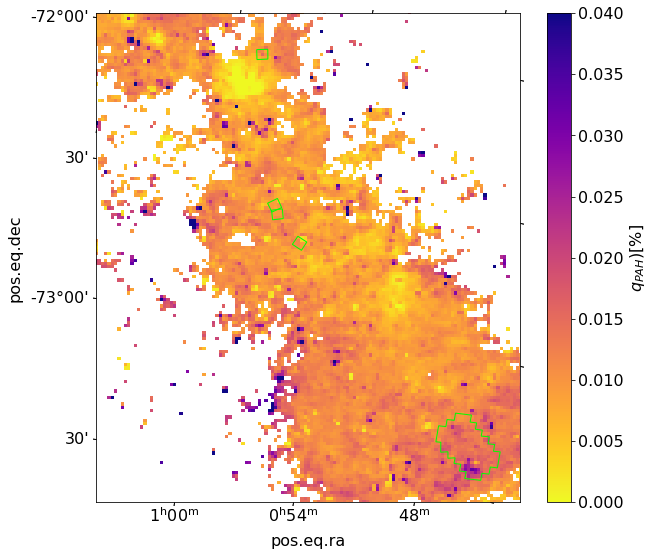

In [117]:
cmap='plasma_r'
data_id='qpah' #'sigd'
if data_id=='sigd':
    ext=4
    label="$log(\Sigma_{DUST})$$[M_{\odot}/pc^2]$"
elif data_id=='qpah':
    ext=2
    label="$q_{PAH})$$[\%]$"

img = fits.open("../" + gal + "_dl07_fixedbeta_06sep18_dust_param_realizations_2.fits", ignore_blank=True)[ext]
hdr = img.header
data = img.data
regfile_smidge = "../../smc_data/smidge/all_acs.reg"

if gal == "SMC":
    extent = [580, 650, 300, 380]
    extent = [580, 710, 230, 380] # qPAH fields
    # extent = [400, 760, 200, 430] # full SMC
else:
    extent = [680, 100, 80, 650]

plt.figure(figsize=(21, 9))
wcs = WCS(hdr, naxis=0, fix=False)
ax = plt.subplot(122, projection=wcs)
cb = ax.imshow(data, cmap=cmap, vmax=0.04)
cbar = plt.colorbar(cb)
cbar.set_label(label=label, size=16)
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
plot_region(regfile_smidge, hdr, ax)

for i in range(nfiles):
    field_str = stats_file[i].split('/')[-1].split('_beast')[0]
    print(field_str)

    regfile = "../region_files/" + gal + "/" + field_str + ".reg"
    print("regfile", regfile)

    plot_region(regfile, hdr, ax)

plt.savefig("../scylla_smidge_" + data_id + "_" + str(nfiles) + "regions1.png", bbox_inches='tight')

### Check averaged maps

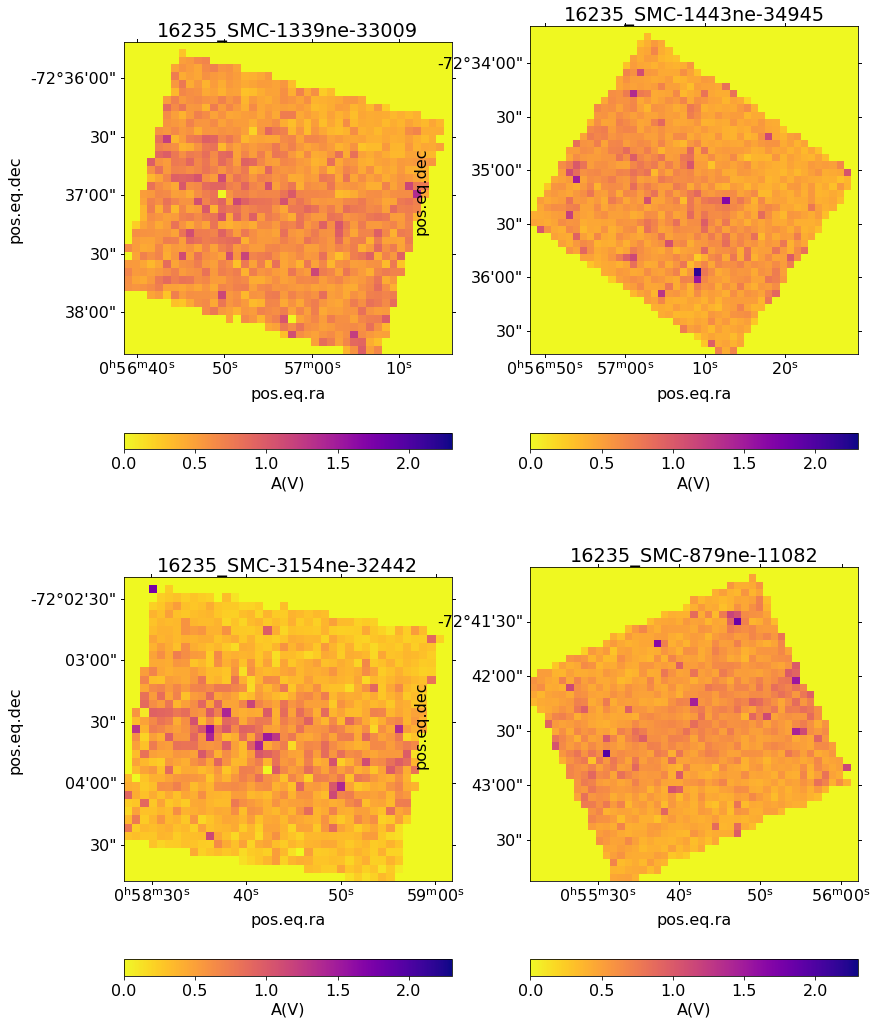

In [119]:
param = 'Av'
plt.figure(figsize=(12, 18)) # 2x2 plot as a check
plt.subplots_adjust(wspace=0.24, hspace=0.004, left=0.1, top=0.936, right=0.95)

plot_loc=220
for i in range(nfiles):
    stats_file_fits_only = stats_file[i].split(gal+'/')[1]
    new_file_fits_only = map_folder + stats_file_fits_only.replace("_HRC.", ".")

    map_file = glob(new_file_fits_only.split("stats")[0] + "map_"+param+"*")[0]
    field_str = map_file.split('/')[-1].split('_beast')[0]
    
    if len(map_file) > 0:
        n_map = fits.open(map_file)[0]
        mapdata = n_map.data
        hdr = n_map.header

        plot_loc+=1
        wcs = WCS(hdr, naxis=0, fix=False)
        ax = plt.subplot(plot_loc, projection=wcs)
        cb = ax.imshow(mapdata, cmap=cmap, vmax=2.3, label='%s' % field_str)
        plt.title('%s' % field_str)
        cbar = plt.colorbar(cb, orientation='horizontal')
        cbar.set_label(label="A(V)", size=16)
        
plt.savefig(map_folder + "scylla_" + param + "_maps_qpah.png", bbox_inches='tight')

In [68]:
def plot_region(regfile, hdr, ax):
    """
    Plot region from a DS9 region file.

    Parameters
    ----------
    regfile:    string
                Path to and region file
    hdu:        Header Data Unit
                The HDU of the map/data on top of which the region is plotted.
    ax:         matplotlib axis object
                The axis of the plot

    Returns
    -------
    """

    r = pyregion.open(regfile).as_imagecoord(header=hdr)
    r1 = pyregion.ShapeList([rr for rr in r if rr.attr[1].get("tag") == "Group 1"])
    patch_list1, artist_list1 = r1.get_mpl_patches_texts(fixed_color)
    r2 = pyregion.ShapeList([rr for rr in r if rr.attr[1].get("tag") != "Group 1"])
    patch_list2, artist_list2 = r2.get_mpl_patches_texts()
    for p in patch_list1 + patch_list2:
        ax.add_patch(p)

def fixed_color(shape, saved_attrs):
    attr_list, attr_dict = saved_attrs
    attr_dict["color"] = "red"
    kwargs = properties_func_default(shape, (attr_list, attr_dict))

    return kwargs